In [3]:
import pandas as pd

data = pd.read_csv("IMDB Dataset.csv", on_bad_lines='skip')
data.sample(n=10)

,review,sentiment
32241,"This movie is nothing like ""Office Space"" exce...",negative
44471,I first saw this film in the theater way back ...,positive
3038,"i really love this movie , i saw it for the fi...",positive
14445,Oh the hilarity! Oh the joy! Another film that...,negative
9456,Hoot is the best movie. go and see it if you h...,positive
3937,This documentary has been aired on both RTE an...,positive
4020,black tar can't be snorted there's a documenta...,positive
37720,"In a phrase, moral ambiguity. In the Soderberg...",positive
15754,"I loved this film, Independent film-making at ...",positive
36103,Goldie Hawn's depiction of a simple young lady...,positive


In [4]:
data['label'] = data['sentiment'].replace(['positive', 'negative'],['1', '0'])
data.sample(n=10)

,review,sentiment,label
19189,"A strangely enjoyable effort, combining an app...",positive,1
39638,"""Jake Speed"" is a fine movie with a wonderful ...",positive,1
40462,This review is based on the dubbed Shock-o-Ram...,negative,0
25581,Not to mention easily Pierce Brosnon's best pe...,positive,1
11224,This film was just on two nights running on IT...,negative,0
27260,William Hurt scuba diving scientist??? US agen...,negative,0
44599,"In the mid 1800s, Irishman Dennis Hopper (as D...",negative,0
1662,Wonderful film that mixes documentary and fict...,positive,1
35416,One of Alfred Hitchcock's three greatest films...,positive,1
47292,CORRIDORS OF BLOOD <br /><br />Aspect ratio: 1...,negative,0


In [5]:
data['label'].value_counts()

label
1    25000
0    25000
Name: count, dtype: int64

In [6]:
data.to_csv('IMDB_Dataset_label.csv')

In [7]:
#Text Preprocessing for sentiment analysis
import string
import emoji
import re
import nltk
from textblob import TextBlob
from nltk.corpus import wordnet
from nltk.metrics import edit_distance
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd

nltk.download(['stopwords', 'punkt', 'wordnet'])

stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
def preprocess(text):
    
    #1. Generating the list of words in the tweet (hastags and other punctuations removed)
    text_blob = TextBlob(text)
    text = ' '.join(text_blob.words)
    
    #2. clean the number 
    text = re.sub(r'[0-9]', '', text)
    
    #3. lower the text
    text = text.lower()
    
    #4. convert the emoji to text form
    text = emoji.demojize(text)
    
    #5. remove punctuation 
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    
    #6. tokenize the text
    text = word_tokenize(text)
    
    #7. remove empty token
    text = [t for t in text if len(t) > 0]
    
    #8. remove non-alphabetical token
    text = [t for t in text if t.isalpha()]
    
    #9. replace the negation token
    replacer  = AntonymReplacer()
    text = replacer.replace_negations(text)
    
    #10. remove the stopwords
    text = [i for i in text if i not in stopwords]
    
    #11. stem the text
    porter_stemmer = PorterStemmer()
    text = [porter_stemmer.stem(w) for w in text]
    
    return text

class AntonymReplacer(object):
    def replace(self, word, pos=None):
        antonyms = set()

        for syn in wordnet.synsets(word, pos=pos):
            for lemma in syn.lemmas():
                for antonym in lemma.antonyms():
                    antonyms.add(antonym.name())

        if len(antonyms) == 1:
            return antonyms.pop()
        else:
            return None

    def replace_negations(self, sent):
        i, l = 0, len(sent)
        words = []

        while i < l:
            word = sent[i]

            if word == 'not' and i+1 < l:
                ant = self.replace(sent[i+1])

                if ant:
                    words.append(ant)
                    i += 2
                    continue

            words.append(word)
            i += 1

        return words

In [9]:
print(data['review'].iloc[12])
print(preprocess(data['review'].iloc[12]))

So im not a big fan of Boll's work but then again not many are. I enjoyed his movie Postal (maybe im the only one). Boll apparently bought the rights to use Far Cry long ago even before the game itself was even finsished. <br /><br />People who have enjoyed killing mercs and infiltrating secret research labs located on a tropical island should be warned, that this is not Far Cry... This is something Mr Boll have schemed together along with his legion of schmucks.. Feeling loneley on the set Mr Boll invites three of his countrymen to play with. These players go by the names of Til Schweiger, Udo Kier and Ralf Moeller.<br /><br />Three names that actually have made them selfs pretty big in the movie biz. So the tale goes like this, Jack Carver played by Til Schweiger (yes Carver is German all hail the bratwurst eating dudes!!) However I find that Tils acting in this movie is pretty badass.. People have complained about how he's not really staying true to the whole Carver agenda but we on

In [10]:
BATCH_SIZE = 256
# SENTIMENT
POSITIVE = "positive"
NEGATIVE = "negative"
NEUTRAL = "neutral"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

In [11]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [12]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = sg_model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}

### TFIDF Vectorizer

In [13]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vec1= TfidfVectorizer(
    analyzer=preprocess,
    max_df=0.8,
    min_df=2,
    sublinear_tf=True,
    use_idf=True
)

tfidf_model = vec1.fit(data['review'])
train_tfidf = vec1.transform(data['review'])

CPU times: total: 10min 8s
Wall time: 10min 53s


In [16]:
import pickle

#save vectorizer
tfidf_vectorizer_file = 'tfidf_vectorizer.sav';
pickle.dump(tfidf_model, open(tfidf_vectorizer_file, 'wb'))

In [17]:
from sklearn.model_selection import train_test_split
SEED = 4000

tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(train_tfidf, 
                                            data.label, test_size=0.2, random_state=SEED)

In [18]:
tfidf_vectorizer = 'tfidf_vectorizer.sav'
loaded_tfidf_vectorizer = pickle.load(open(tfidf_vectorizer, 'rb'))#load save vectorizer

## SVM-TFIDF

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC

seed = 42
tfidf_clf_svm = SVC(random_state=seed)

tfidf_clf_svm.fit(tfidf_X_train, tfidf_y_train.values)
tfidf_y_pred = tfidf_clf_svm.predict(tfidf_X_test)

In [20]:
print(f'Accuracy: {accuracy_score(tfidf_y_test.values, tfidf_y_pred)}')

Accuracy: 0.8989


In [21]:
print(f'Confusion matrix:\n {confusion_matrix(tfidf_y_test, tfidf_y_pred)}')

Confusion matrix:
 [[4435  571]
 [ 440 4554]]


In [31]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

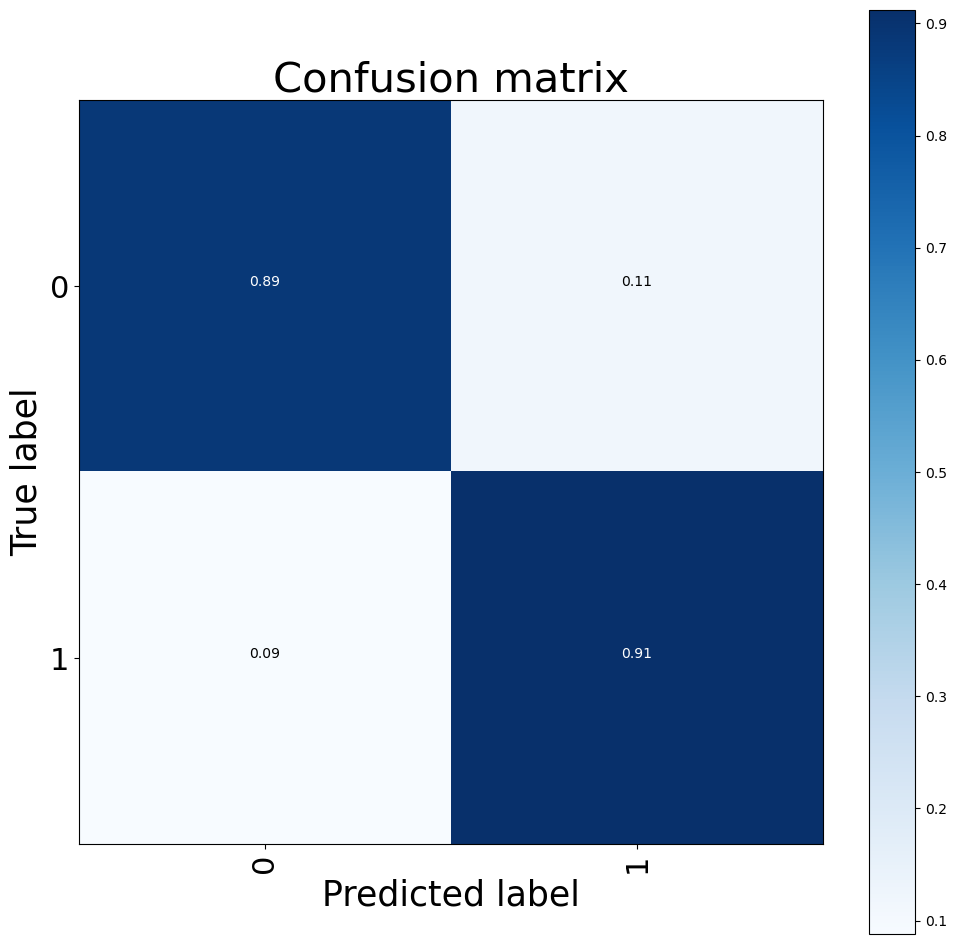

In [32]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(tfidf_y_test, tfidf_y_pred)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=np.unique(tfidf_y_train), title="Confusion matrix")
plt.show()

In [33]:
pickle.dump(tfidf_clf_svm, open('SVMTFIDF.sav', 'wb'))

In [34]:
filename1 = 'SVMTFIDF.sav' #load trained model
loaded_tfidf_clf_svm = pickle.load(open(filename1, 'rb'))

In [35]:
tweet = 'We are providing better care, and more choice, at lower cost.'
preprocess_tweet = preprocess(tweet)
print(preprocess_tweet)

['provid', 'better', 'care', 'choic', 'lower', 'cost']


In [36]:
# predict a label using SVM
tweet_vec = loaded_tfidf_vectorizer.transform(pd.Series([tweet]))
tweet_prediction = loaded_tfidf_clf_svm.predict(tweet_vec.toarray())
tweet_prediction = 'positive' if tweet_prediction[0] == '1' else 'positive'
print(f'"{tweet_prediction}" has been predicted for the tweet: {tweet}')

"positive" has been predicted for the tweet: We are providing better care, and more choice, at lower cost.


### Count Vectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vec2= CountVectorizer(
    analyzer=preprocess,
    max_df=0.8,
    min_df=2,
)

count_model = vec2.fit(data['review'])
train_count = vec2.transform(data['review'])


In [38]:
import pickle

#save vectorizer
count_vectorizer_file = 'count_vectorizer.sav';
pickle.dump(count_model, open(count_vectorizer_file, 'wb'))

In [39]:
from sklearn.model_selection import train_test_split
SEED = 4000

count_X_train, count_X_test, count_y_train, count_y_test = train_test_split(train_count, 
                                            data.label, test_size=0.2, random_state=SEED)

In [40]:
import pickle


count_vectorizer = 'count_vectorizer.sav'
loaded_count_vectorizer = pickle.load(open(count_vectorizer, 'rb'))#load save vectorizer

### SVM - Count

In [41]:
from sklearn.svm import SVC

seed = 42
count_clf_svm = SVC(random_state=seed)

count_clf_svm.fit(count_X_train, count_y_train.values)
count_y_pred = count_clf_svm.predict(count_X_test)

In [42]:
print(f'Accuracy: {accuracy_score(count_y_test.values, count_y_pred)}')

Accuracy: 0.8797


In [43]:
print(f'Confusion matrix:\n {confusion_matrix(count_y_test, count_y_pred)}')

Confusion matrix:
 [[4282  724]
 [ 479 4515]]


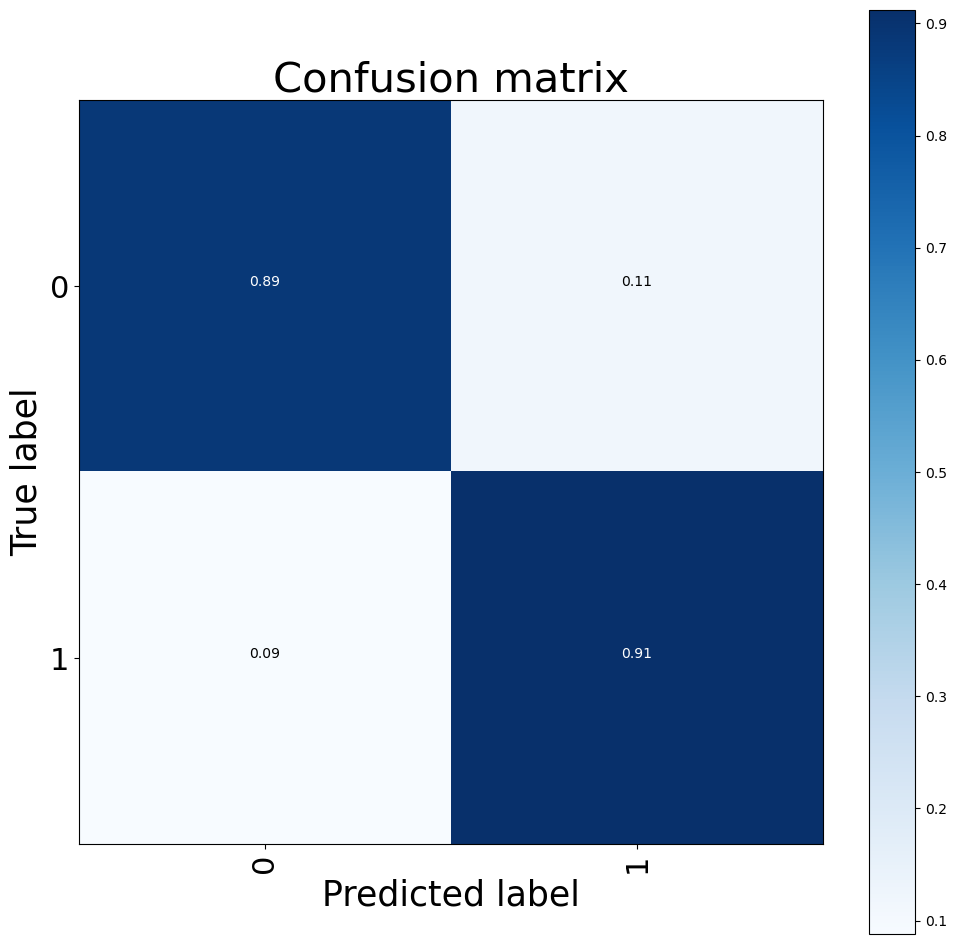

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

cnf_matrix1 = confusion_matrix(tfidf_y_test, tfidf_y_pred)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix1, classes=np.unique(count_y_train), title="Confusion matrix")
plt.show()

In [45]:
pickle.dump(tfidf_clf_svm, open('SVMCount.sav', 'wb'))

In [47]:
filename2 = 'SVMCount.sav' #load trained model
loaded_tfidf_clf_svm = pickle.load(open(filename2, 'rb'))

In [48]:
# predict a label using SVM
tweet_vec1 = loaded_count_vectorizer.transform(pd.Series([tweet]))
tweet_prediction = loaded_tfidf_clf_svm.predict(tweet_vec1.toarray())
tweet_prediction = 'positive' if tweet_prediction[0] == '1' else 'negative'
print(f'"{tweet_prediction}" has been predicted for the tweet: {tweet}')

"negative" has been predicted for the tweet: We are providing better care, and more choice, at lower cost.
